In [1]:
import pandas as pd

df = pd.read_csv('visits.csv', sep='\t')

df['too_fast'] = df['time_spent'] < 60
df['too_slow'] = df['time_spent'] > 1000

too_fast_stat = df.pivot_table(index='id', values='too_fast')

good_ids = too_fast_stat.query('too_fast < 0.5')
good_data = df.query('id in @good_ids.index')
good_data = good_data.query('60 <= time_spent <= 1000')

station_stat = df.pivot_table(
    index='id', values='time_spent', aggfunc='median')
good_stations_stat = good_data.pivot_table(
    index='id', values='time_spent', aggfunc='median')

stat = df.pivot_table(index='name', values='time_spent')
good_stat = good_data.pivot_table(
    index='name', values='time_spent', aggfunc='median')
stat['good_time_spent'] = good_stat['time_spent']

id_name = good_data.pivot_table(
    index='id', values='name', aggfunc=['first', 'count'])
id_name.columns = ['name', 'count']

station_stat_full = id_name.join(good_stations_stat)

good_stat2 = (
    station_stat_full
    .query('count > 30').pivot_table(
        index='name', values='time_spent', aggfunc=['median', 'count']))

good_stat2.columns = ['median_time', 'stations']
final_stat = stat.join(good_stat2)
final_stat.head()

,time_spent,good_time_spent,median_time,stations
name,,,,
Агератум,337.802721,309.0,308.50,3.0
Амарант,132.760012,187.5,169.00,5.0
Аммобиум,256.708042,180.5,178.75,4.0
Арктотис,73.879984,185.0,190.50,3.0
Астильба,376.143149,423.0,435.50,4.0


<AxesSubplot:xlabel='name'>

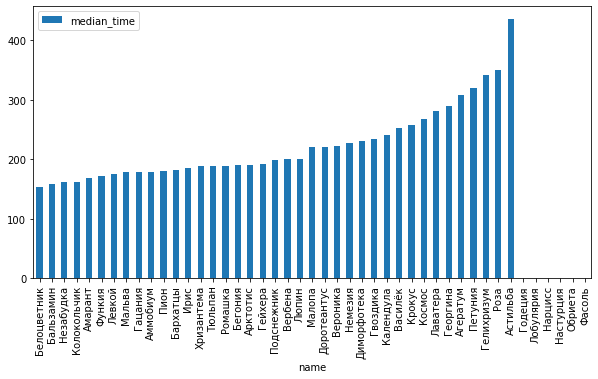

In [2]:
final_stat.sort_values(by='median_time', ascending=True).plot(
    y='median_time', kind='bar', figsize=(10, 5))


<AxesSubplot:xlabel='name'>

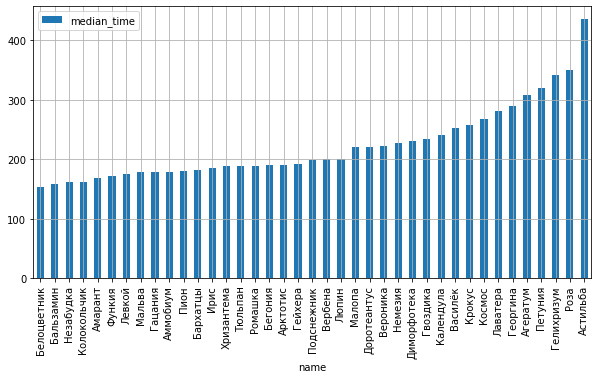

In [3]:
final_stat.sort_values(by='median_time', ascending=True).dropna(
    subset=['median_time']).plot(
    y='median_time',
    kind='bar',
    figsize=(10, 5),
    grid=True)

<AxesSubplot:>

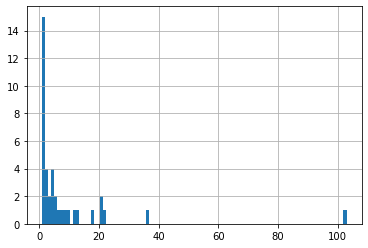

In [4]:
final_stat['stations'].hist(bins=100)

In [5]:
big_nets_stat = final_stat.query('stations > 10')
big_nets_stat.head(10)


,time_spent,good_time_spent,median_time,stations
name,,,,
Василёк,268.849897,264.0,252.00,103.0
Гейхера,167.445947,204.0,192.00,12.0
Календула,207.357323,254.0,240.00,36.0
Колокольчик,119.131564,161.0,161.00,21.0
Люпин,235.440937,186.0,200.00,13.0
Мальва,136.562234,182.0,177.75,22.0
Немезия,186.535207,226.0,227.50,21.0
Роза,260.877217,315.0,350.00,18.0


In [6]:
big_nets_stat_index = big_nets_stat.index
station_stat_full['group_name'] = station_stat_full['name'].where(
    station_stat_full['name'].isin(big_nets_stat_index), 'Другие')
station_stat_full.sort_values(by='time_spent', ascending=True)
station_stat_full.head()

,name,count,time_spent,group_name
id,,,,
00ca1b70,Вероника,131,166.0,Другие
0178ce70,Василёк,164,234.5,Василёк
01abf4e9,Гацания,30,181.5,Другие
030a9067,Колокольчик,228,135.5,Колокольчик
03740f2d,Василёк,157,289.0,Василёк


In [7]:
stat_grouped = (
    station_stat_full
    .pivot_table(
        index='group_name', values='time_spent', aggfunc=['median','count']))
stat_grouped.columns = ['time_spent', 'count']
stat_grouped.sort_values(by='time_spent', ascending=True)

stat_grouped.head(10)

,time_spent,count
group_name,,
Василёк,250.00,107
Гейхера,192.00,12
Другие,208.75,124
Календула,240.00,36
Колокольчик,161.00,21
Люпин,205.00,18
Мальва,177.75,22
Немезия,227.50,21
Роза,315.50,25


<AxesSubplot:ylabel='count'>

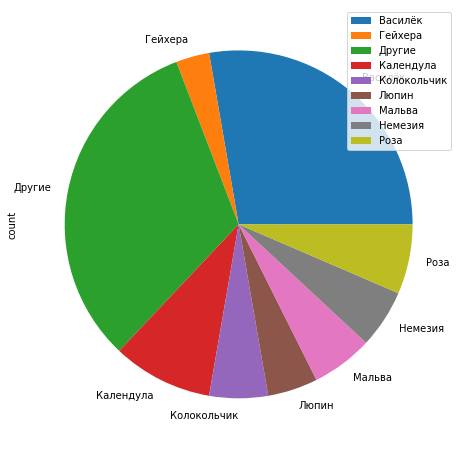

In [8]:
stat_grouped.plot(y='count', kind='pie', figsize=(8,8))

In [9]:
good_data['group_name'] = station_stat_full['name'].where(
    good_data['name'].isin(big_nets_stat_index), 'Другие')

In [12]:
for name, group_data in good_data.groupby('group_name'):
    stat_grouped['time_spent'].hist(bins=50)

In [11]:
for name, group_data in good_data.groupby('group_name'):
    group_data.plot(y='time_spent', title=name, kind='hist', bins=50)